In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

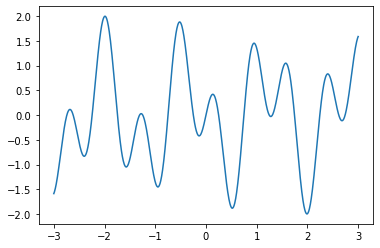

torch.Size([1000, 1])

In [2]:
# pytorch only takes 2d x input so we use unsqueeze to insert a dimension of size one
a = -3.9
b = 8.7
x = torch.unsqueeze(torch.linspace(-3,3,1000), dim=1)
y = (torch.sin(a*x) + torch.sin(b*x))

# plot
plt.plot(x.data.numpy(),y.data.numpy())
plt.show()

y.shape

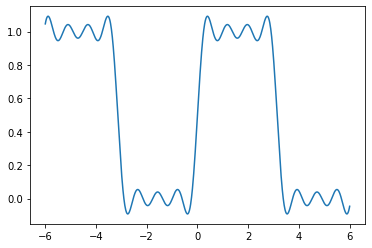

In [3]:
"""
Square wave

A(X) = 0.5 + sum(all the odd N's){ 2*sin(nx)/(n*pi) }
"""
N_max = 8 #the larger the value the steeper the transition from 0 to 1 and the more "square"
n_odds = torch.arange(1,N_max,2)
xs = torch.unsqueeze(torch.linspace(-6,6,1000), dim=1)
ys = torch.as_tensor([0.5+sum(np.multiply(2/(n_odds*np.pi), np.sin(n_odds*x))) for x in xs])

plt.plot(xs, ys)
plt.show()

In [4]:
class Sine(nn.Module):
    def __init__(self, w0=1.0):
        """Sine activation function with w0 scaling support.
        Example:
            >>> w = torch.tensor([3.14, 1.57])
            >>> Sine(w0=1)(w)
            torch.Tensor([0, 1])
        :param w0: w0 in the activation step `act(x; w0) = sin(w0 * x)`.
            defaults to 1.0
        :type w0: float, optional
        """
        super(Sine, self).__init__()
        self.w0 = w0

    def forward(self, x):
        self._check_input(x)
        return torch.sin(self.w0 * x)
    
    @staticmethod
    def _check_input(x):
        if not isinstance(x, torch.Tensor):
            raise TypeError('input to forward() must be torch.xTensor')

In [5]:
class ThreeLayerNet(nn.Module):
    def __init__(self):
        super(ThreeLayerNet, self).__init__() 
        self.linear_1 = nn.Linear(1, 200) 
        self.linear_2 = nn.Linear(200, 200) 
        self.linear_3 = nn.Linear(200, 1)
        
    def forward(self,x):
        x = torch.sin(self.linear_1(x))  # sine
        x = torch.sin(self.linear_2(x))     # relu 
        
        x = self.linear_3(x)
        return x

net = ThreeLayerNet()
net

ThreeLayerNet(
  (linear_1): Linear(in_features=1, out_features=200, bias=True)
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (linear_3): Linear(in_features=200, out_features=1, bias=True)
)

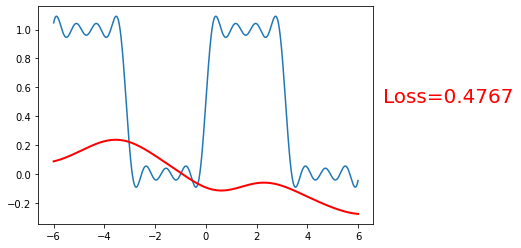

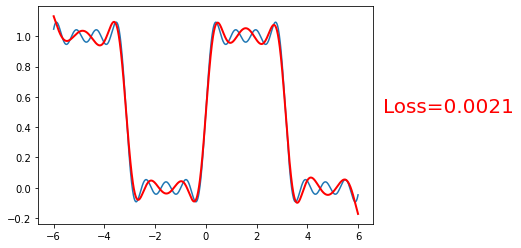

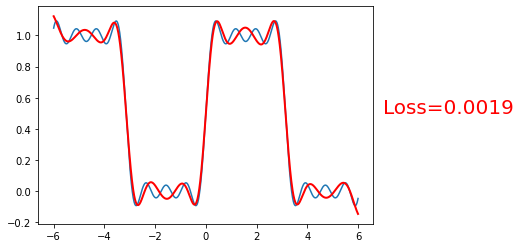

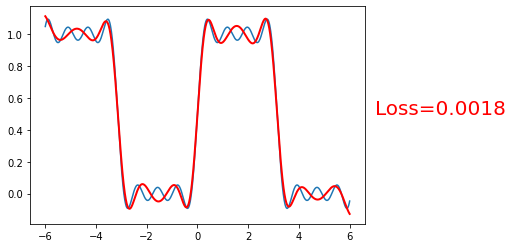

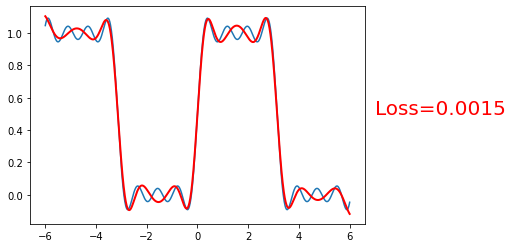

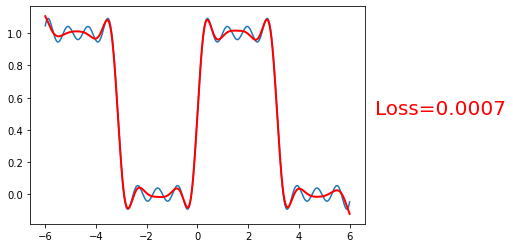

In [6]:
#optimizer
optimizer = torch.optim.SGD(net.parameters(),lr=0.1)

# loss
loss_func = torch.nn.MSELoss()

for t in range(6000):
    prediction = net(xs)
    prediction = torch.squeeze(prediction)
    loss = loss_func(prediction,ys)
    
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()
    
    if t % 1000 == 0:
        # plot and show learning process
        plt.plot(xs.data, ys.data)
        plt.plot(xs.data, prediction.data, 'r-', lw=2)
        plt.text(7.0, 0.5, 'Loss=%.4f' % loss.data, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)